              precision    recall  f1-score   support

           0       0.97      0.41      0.58       234
           1       0.74      0.99      0.85       390

    accuracy                           0.77       624
   macro avg       0.85      0.70      0.71       624
weighted avg       0.82      0.77      0.74       624

Accuracy: 0.7740384615384616
Model Parameters:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


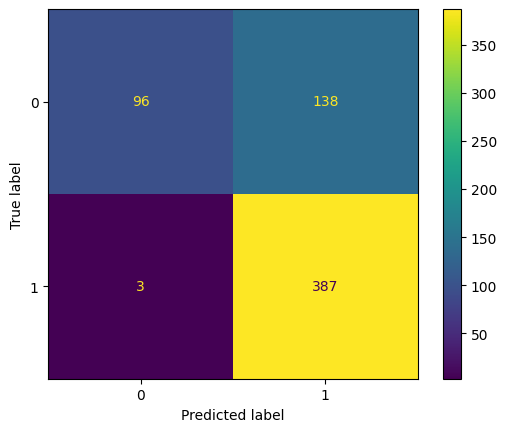

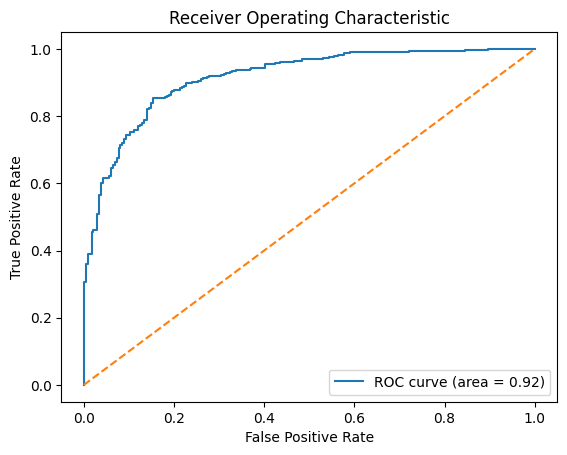

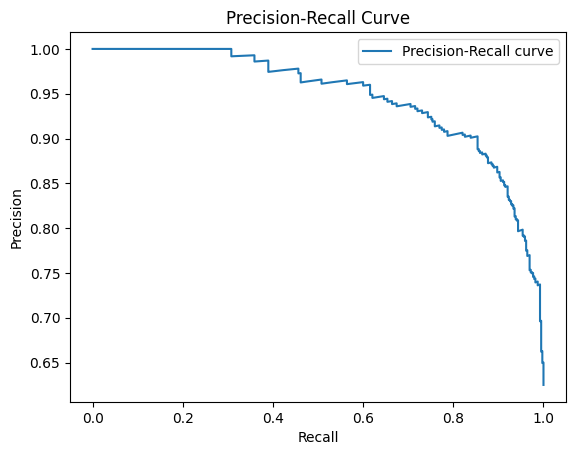

In [ ]:
# Import necessary libraries
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import resize
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import numpy as np
import os
import glob
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Define paths
base_path = '/content/drive/MyDrive/chest_xray'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')
model_path = os.path.join(base_path, 'model')

if not os.path.exists(model_path):
    os.makedirs(model_path)

def extract_hog_features_from_directory(directory, label):
    features = []
    labels = []
    image_files = glob.glob(os.path.join(directory, '*.jpeg'))
    for image_file in image_files:
        image = imread(image_file, as_gray=True)
        image_resized = resize(image, (150, 150))
        hog_feature = hog(image_resized, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), block_norm='L2-Hys')
        features.append(hog_feature)
        labels.append(label)
    return features, labels

# Extract features and labels from the training images
features_normal, labels_normal = extract_hog_features_from_directory(os.path.join(train_path, 'NORMAL'), 0)
features_pneumonia, labels_pneumonia = extract_hog_features_from_directory(os.path.join(train_path, 'PNEUMONIA'), 1)

X_train = np.array(features_normal + features_pneumonia)
y_train = np.array(labels_normal + labels_pneumonia)

# Extract features and labels from the testing images
features_normal_test, labels_normal_test = extract_hog_features_from_directory(os.path.join(test_path, 'NORMAL'), 0)
features_pneumonia_test, labels_pneumonia_test = extract_hog_features_from_directory(os.path.join(test_path, 'PNEUMONIA'), 1)

X_test = np.array(features_normal_test + features_pneumonia_test)
y_test = np.array(labels_normal_test + labels_pneumonia_test)

# Create an SVM classifier
clf = SVC(kernel='linear', probability=True)

# Train the SVM classifier
clf.fit(X_train, y_train)

# Save the trained model
model_filename = os.path.join(model_path, 'svm_chest_xray_classifier.joblib')
joblib.dump(clf, model_filename)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Print out the classification report
print(classification_report(y_test, y_pred))

# Print out the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Model Parameters
print("Model Parameters:")
print(clf.get_params())

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# ROC Curve and AUC
y_score = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()


In [ ]:
!pip install pydot graphviz


Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.
Reloading Tuner from /content/drive/MyDrive/keras_tuner_chest_xray/tuner0.json

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 32 and the optimal learning rate for the
optimizer is 0.0001.

Epoch 1/50
130/130 [==============================] - 693s 5s/step - loss: 0.0709 - accuracy: 0.9752 - val_loss: 0.0876 - val_accuracy: 0.9717
Epoch 2/50
130/130 [==============================] - 644s 5s/step - loss: 0.0691 - accuracy: 0.9738 - val_loss: 0.0842 - val_accuracy: 0.9727
Epoch 3/50
130/130 [==============================] - 648s 5s/step - loss: 0.0659 - accuracy: 0.9771 - val_loss: 0.0900 - val_accuracy: 0.9619
Epoch 4/50
130/130 [==============================] - 646s 5s/step - loss: 0.0600 - accuracy: 0.9779 - val_loss: 0.0796 - val_accuracy: 0.9727
Epoch 5/50
130/130 [==============================] - 650s 5s/step - loss: 0.0568 - accuracy: 

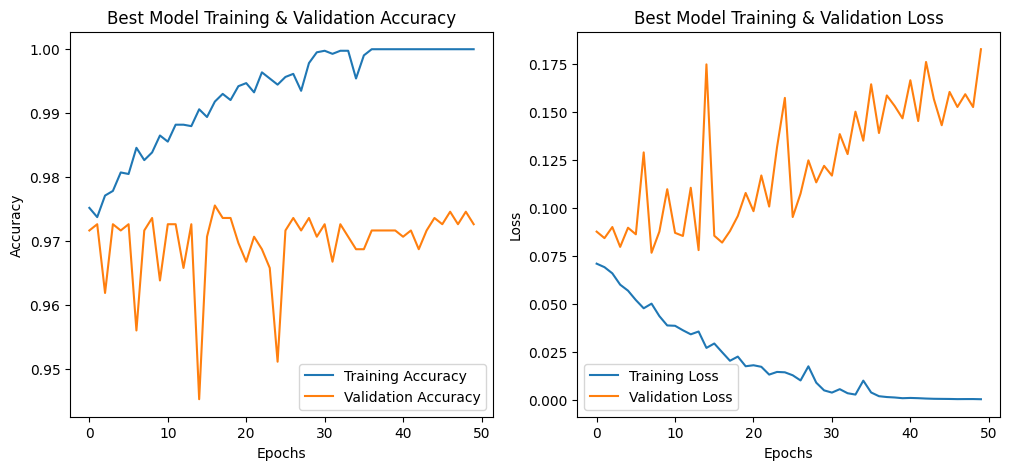

Found 624 images belonging to 2 classes.
19/19 [==============================] - 27s 1s/step
              precision    recall  f1-score   support

           0       0.98      0.36      0.53       234
           1       0.71      0.99      0.83       374

    accuracy                           0.75       608
   macro avg       0.85      0.68      0.68       608
weighted avg       0.82      0.75      0.72       608

Accuracy: 0.75
Precision: 0.71
Recall: 0.99
F1 Score: 0.83


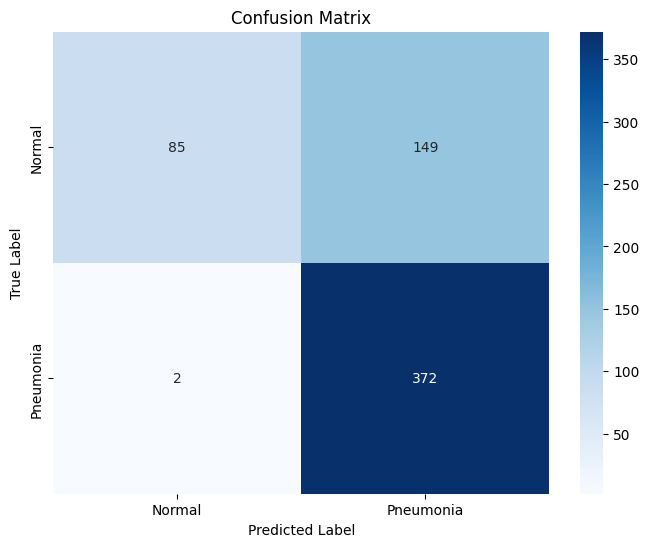

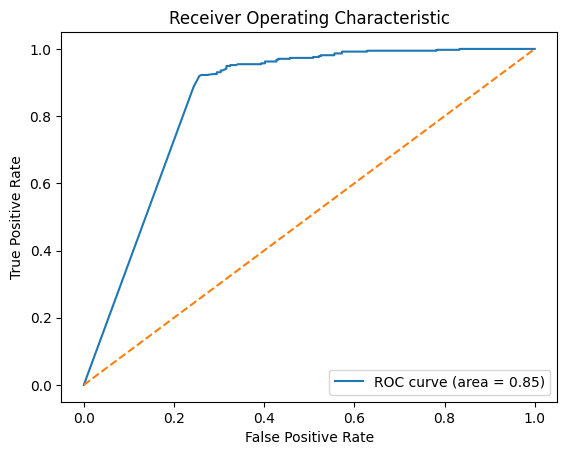

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score ,roc_curve, auc ,confusion_matrix
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras_tuner import RandomSearch
#from sklearn.metrics import roc_curve, auc
#from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define paths
base_path = '/content/drive/MyDrive/chest_xray'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    subset='validation'
)


def build_model(hp):
    model = Sequential([
        Conv2D(
            filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
            kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
            activation='relu',
            input_shape=(150, 150, 1)
        ),
        MaxPooling2D(2, 2),
        Conv2D(
            filters=hp.Int('conv_2_filter', min_value=64, max_value=128, step=16),
            kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
            activation='relu'
        ),
        MaxPooling2D(2, 2),
        Conv2D(
            filters=hp.Int('conv_3_filter', min_value=64, max_value=128, step=16),
            kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]),
            activation='relu'
        ),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(
            units=hp.Int('dense_units', min_value=32, max_value=512, step=32),
            activation='relu'
        ),
        Dense(1, activation='sigmoid')
    ])

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create a tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory=os.path.normpath('/content/drive/MyDrive/'),
    project_name='keras_tuner_chest_xray'
)

# Execute the hyperparameter search
tuner.search(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print out the results of hyperparameter search
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hyperparameters.get('dense_units')} and the optimal learning rate for the
optimizer is {best_hyperparameters.get('learning_rate')}.
""")

# Train the best model with the training data
best_model_history = best_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50
)

# Plot the accuracy and loss for the best model
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(best_model_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Best Model Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(best_model_history.history['loss'], label='Training Loss')
plt.plot(best_model_history.history['val_loss'], label='Validation Loss')
plt.title('Best Model Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the best model
best_model.save(os.path.join(base_path, 'best_chest_xray_model.keras'))

# Evaluate the best model on the test set
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=False
)

# Load the best model
best_model = load_model(os.path.join(base_path, 'best_chest_xray_model.keras'))

# Get predictions from the model
predictions = best_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size)

# Predicted classes: Using a threshold of 0.5
predicted_classes = (predictions > 0.5).astype(int)

# True labels
true_classes = test_generator.classes
true_classes = true_classes[:len(predicted_classes)]

# Classification report
report = classification_report(true_classes, predicted_classes)
print(report)

# Individual metrics
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(true_classes, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
# testing CNN  Model

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

def predict_pneumonia(model_path, image_path):
    # Load the saved model
    model = load_model(model_path)

    # Load the image file, targeting the size used during training
    img = image.load_img(image_path, target_size=(150, 150), color_mode="grayscale")

    # Convert the image to an array and expand dimensions to fit model input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Rescale image as model expects

    # Make a prediction
    prediction = model.predict(img_array)

    # Output whether pneumonia is detected based on the prediction
    if prediction[0] > 0.5:
        return "Pneumonia detected"
    else:
        return "No pneumonia detected"

x = '/content/drive/MyDrive/chest_xray/best_chest_xray_model.keras'
y = '/content/drive/MyDrive/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg'
result = predict_pneumonia(x, y)
print(result)


1/1 [==============================] - 0s 280ms/step
Pneumonia detected


In [ ]:
# Testing of SVM model
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import resize
import joblib
import numpy as np

def predict_pneumonia(image_path, model_path):
    """
    Predicts whether a given chest X-ray image has pneumonia or not.

    Parameters:
    - image_path: Path to the chest X-ray image to be tested.
    - model_path: Path to the saved SVM model.

    Returns:
    - A string indicating whether the image is predicted to have pneumonia or not.
    """
    # Load the saved model
    clf = joblib.load(model_path)

    # Read image in grayscale
    image = imread(image_path, as_gray=True)
    # Resize image to 150x150
    image_resized = resize(image, (150, 150))
    # Extract HOG features
    hog_feature = hog(image_resized, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), block_norm='L2-Hys')
    # Reshape the features to match the input format expected by the classifier
    hog_feature_reshaped = np.array(hog_feature).reshape(1, -1)
    # Predict using the SVM model
    prediction = clf.predict(hog_feature_reshaped)

    # Return the result
    if prediction == 0:
        return "The image is predicted to be NORMAL."
    else:
        return "The image is predicted to have PNEUMONIA."

# Example usage
model_path = '/content/drive/MyDrive/chest_xray/model/svm_chest_xray_classifier.joblib'
image_path = '/content/drive/MyDrive/chest_xray/test/NORMAL/IM-0013-0001.jpeg'  # Update this path to your specific image
result = predict_pneumonia(image_path, model_path)
print(result)


The image is predicted to be NORMAL.
